Algerian Forest Fires

Problem statement: To predict classes(Fire/not Fire) based on different features.

Implementation by Logistic Regression

Data Information The data has 11 attributes and 0ne output attribute

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
RH : Relative Humidity in %: 21 to 90
Ws :Wind speed in km/h: 6 to 29
Rain: total day in mm: 0 to 16.8 FWI Components
Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
Drought Code (DC) index from the FWI system: 7 to 220.4
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
Buildup Index (BUI) index from the FWI system: 1.1 to 68
Fire Weather Index (FWI) Index: 0 to 31.1
Classes: two classes (Fire/not Fire) #Output Attribute

In [1]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# reading dataset
data = pd.read_csv("C:/Users/nawin/Downloads/Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
## Removing unnecessary rows from datasets

data.drop([122,123,167], inplace = True) 
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [4]:
# Adding a new column "region" to dataset

#data.loc[:122,'region']= 'bejaia'
#data.loc[122:,'region']= 'Sidi-Bel Abbes'

In [5]:
## Fetching number of columns and rows
data.shape

(243, 14)

In [6]:
## Fetching Columns 
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
## Cleaning of columns
data.columns=[i.strip() for i in data.columns]
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
## cleaning Classes 
data['Classes']=[i.strip() for i in data['Classes']]
data['Classes']

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
238        fire
239    not fire
240    not fire
241    not fire
242    not fire
Name: Classes, Length: 243, dtype: object

In [9]:
## Adding new column 'Date' by replacing day, month, year
#data['Date'] =pd.to_datetime(data[['day','month','year']])
#data.drop(['day','month','year'], axis=1, inplace=True)

<AxesSubplot:xlabel='Classes', ylabel='count'>

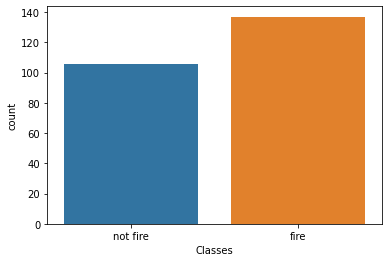

In [10]:
## Checking dependent variable is balanced or not
sns.countplot(data['Classes'],data=data)

## observation: it is balanced

In [11]:
## It is classification problem, so we  label encode values '0' and '1'

data['Classes']= data['Classes'].map({'not fire':0, 'fire':1})

#data['region']=data['region'].map({'Bejaia':0,'Sidi-Bel Abbes':1})

In [12]:
## fetching null values
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [13]:
## conversion of datatypes
data=data.astype({'day':int,'month':int,'year':int,'Temperature':int,'RH':int,'Ws':int,'Classes':int})
data=data.astype({'Rain':float,'FFMC':float,'DMC':float,'ISI':float,'BUI':float,'FWI':float,'DC':float})

In [14]:
data.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
dtype: object

In [15]:
## Checking duplicated values
data[data.duplicated()]

## no duplicate values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


<AxesSubplot:>

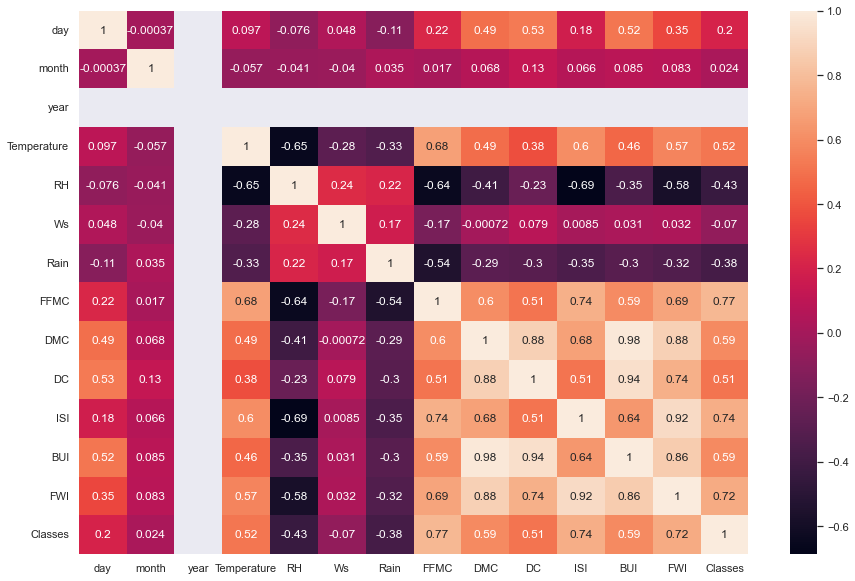

In [16]:
## Plotting heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(),annot=True)

## 'DMC' and 'DC' is highly correlated with 'BUI', so we can drop both and consider BUI

In [17]:
## dropping 'DMC','DC'
data.drop(['DMC','DC'],axis=1,inplace=True)

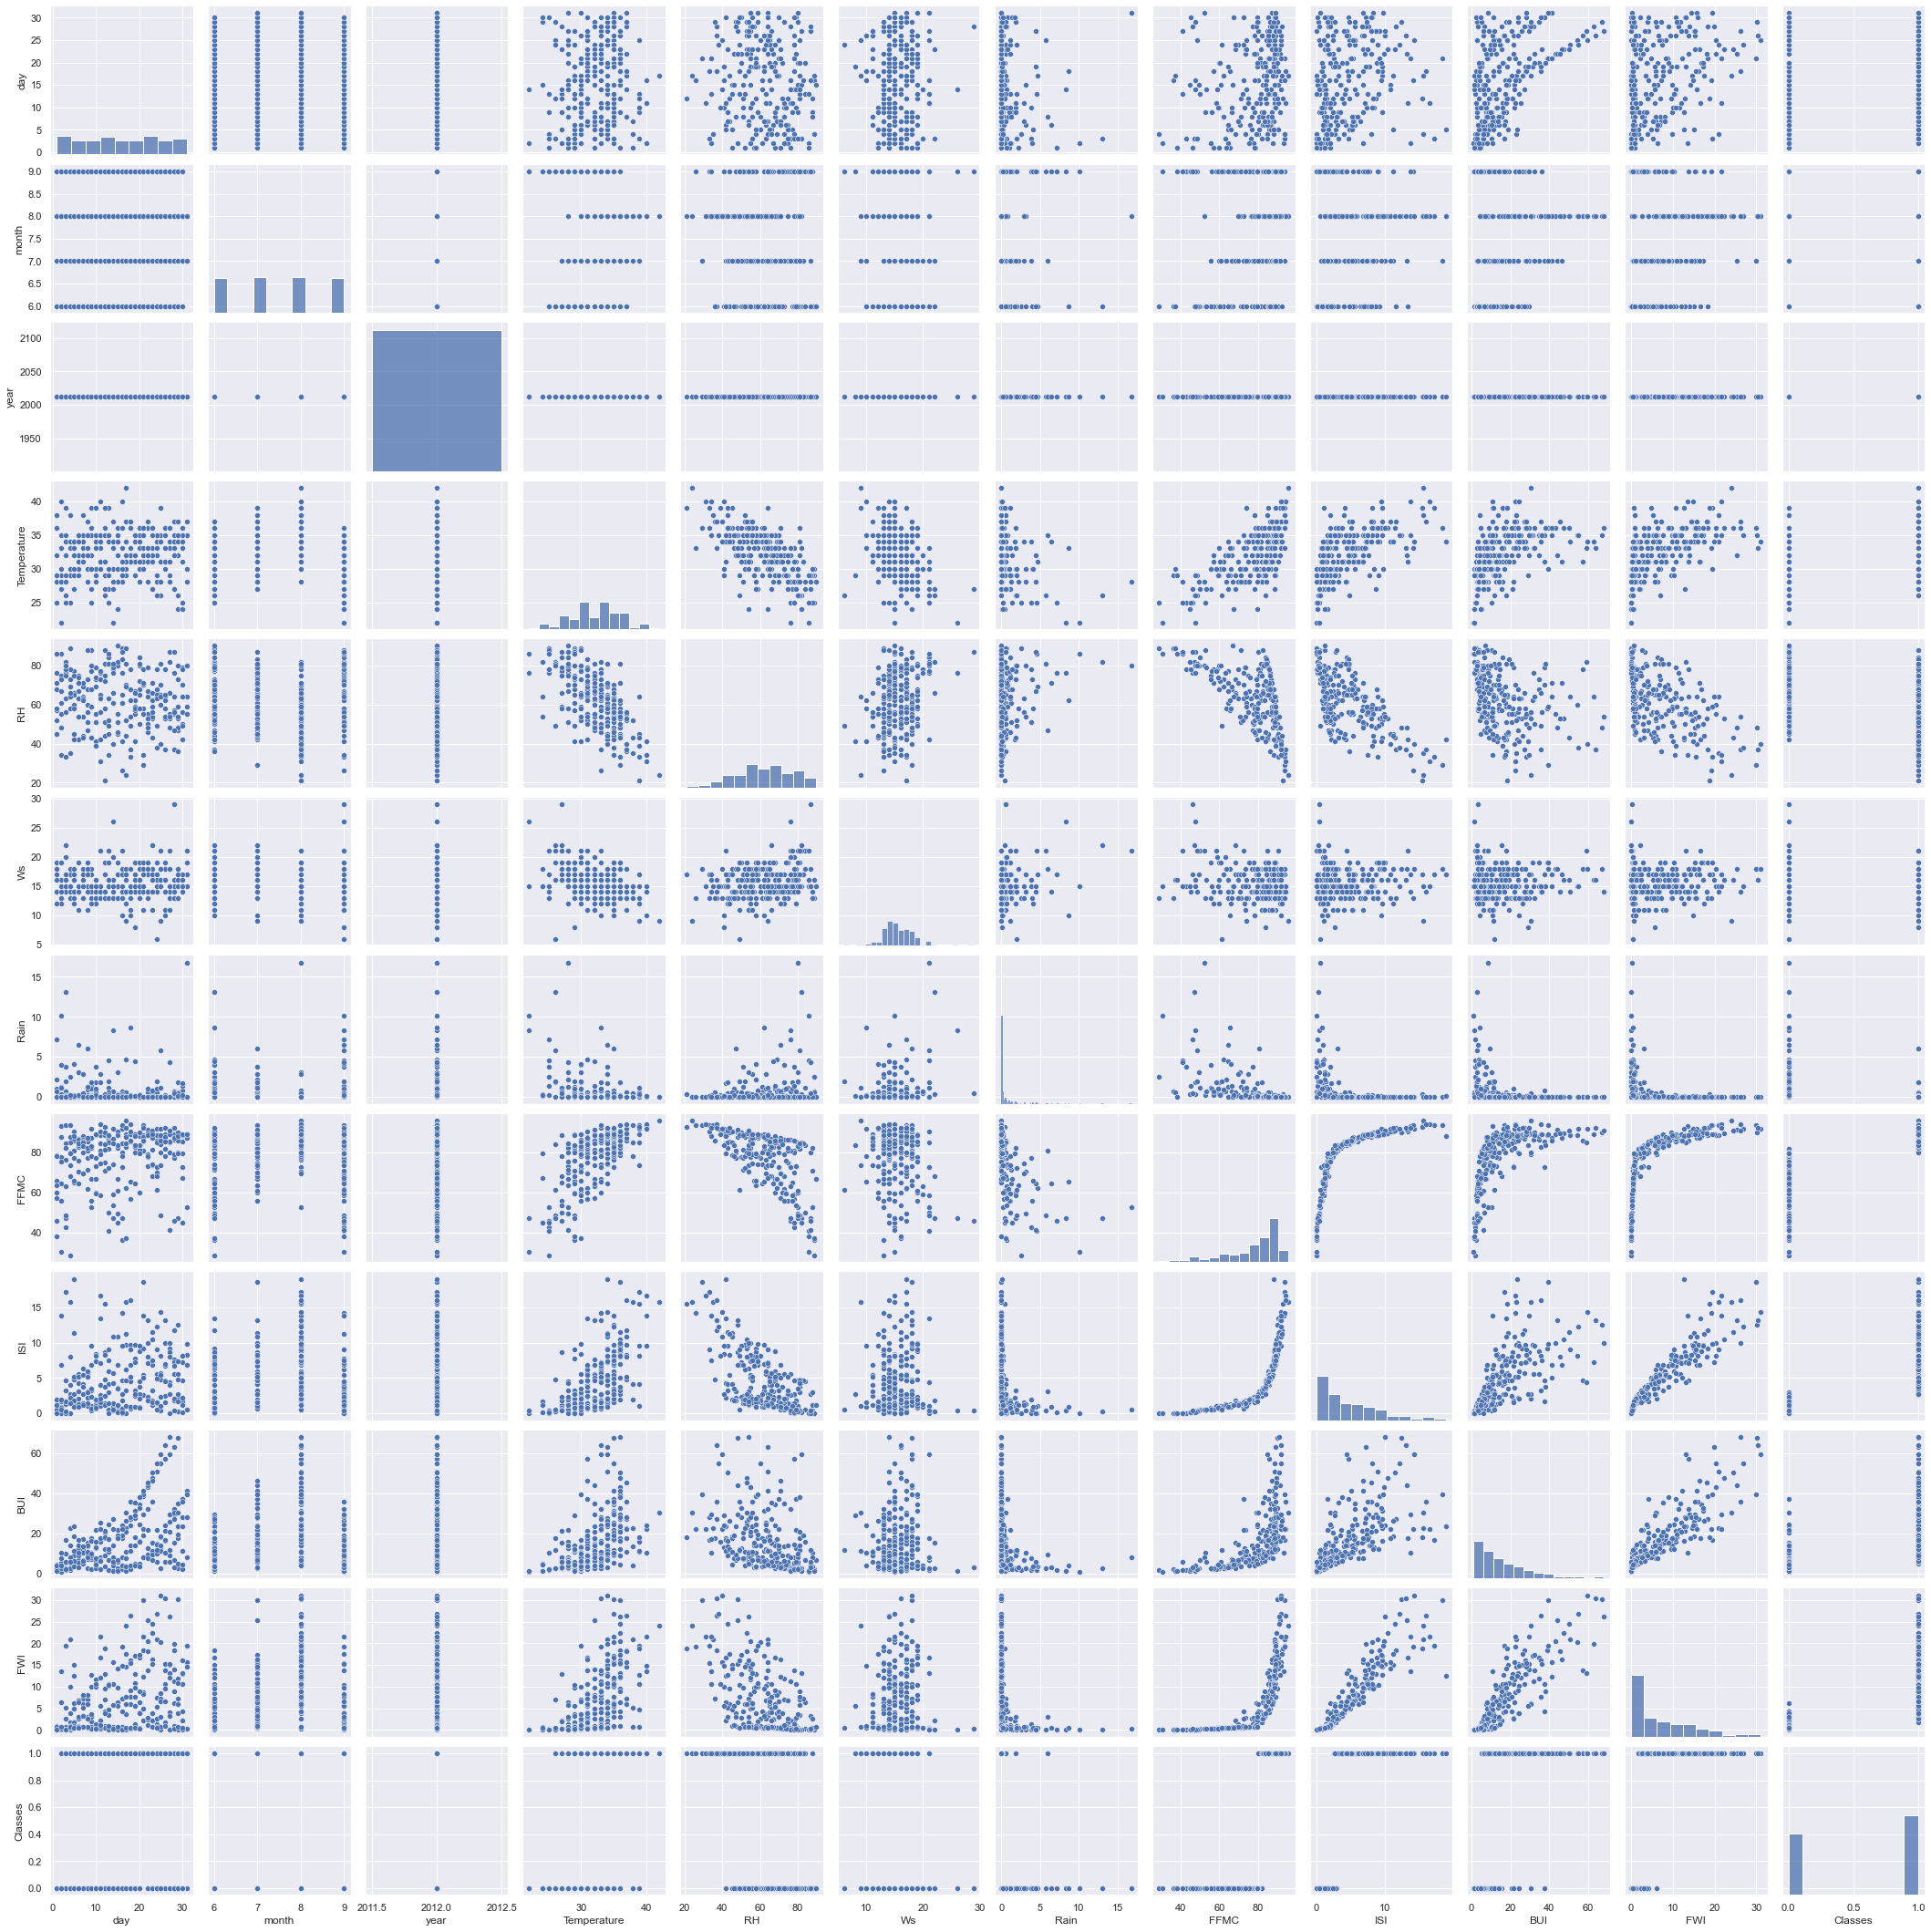

In [18]:
## Plotting pair plot to visualize graphically
sns.pairplot(data)

In [19]:
data.groupby('month')['Classes'].count()

month
6    60
7    61
8    62
9    60
Name: Classes, dtype: int64

In [20]:
data[data['Temperature']==max(data['Temperature'])]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes
198,17,8,2012,42,24,9,0.0,96.0,15.7,30.4,24.0,1


In [21]:
data[data['month']==8 & (data['Classes']==1)]['Classes'].count()

0

In [22]:
data1=pd.DataFrame(data.groupby('month')['Rain'].sum())

In [23]:
data2=pd.DataFrame(data.groupby('month')['Temperature'].sum())

In [24]:
data3=pd.DataFrame(data.groupby('month')['Classes'].sum())

In [25]:
data_month=pd.concat([data1,data2,data3],axis=1)

In [26]:
data_month

,Rain,Temperature,Classes
month,,,
6,58.5,1848,25
7,27.8,2012,38
8,27.8,2191,51
9,71.3,1762,23


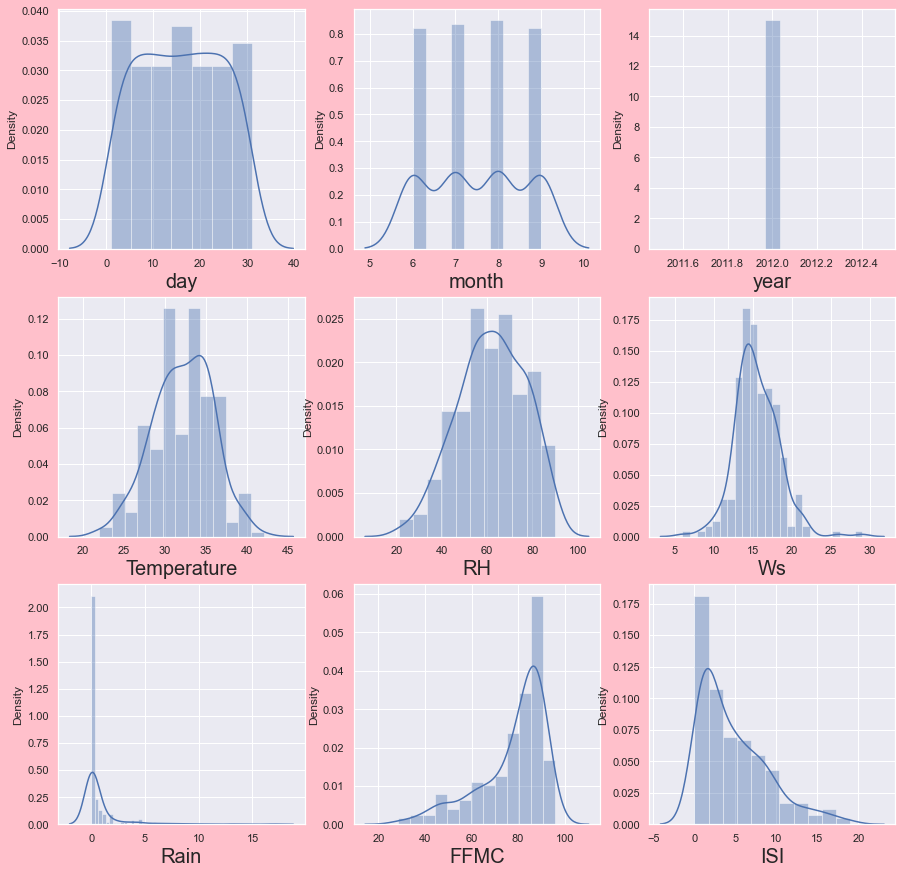

In [27]:
## Distribution of data
plt.figure(figsize=(15,15),facecolor='pink')
columnnumber=1

for column in data:
    if columnnumber<=9:
        ax=plt.subplot(3,3,columnnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    columnnumber+=1
plt.show()

In [28]:
## Selecting independent X and dependednt feature y
X=data.iloc[:,0:-1] 
y=data.iloc[:,-1]

In [29]:
## Splitting data into train and test data
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=15)

In [30]:
## Training the model
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [31]:
## printing coefficient of model
print(log_reg.coef_)

[[-0.14533661  0.08820917 -0.06720458 -0.21660374 -0.05223151  0.83053124
   0.1416838   1.59926582  0.54465717  0.07517455  0.67895709]]


In [32]:
## printing intercept of model
print(log_reg.intercept_)

[-3.66389277e-05]


In [33]:
## Printing Training Score
print('Training Score:',log_reg.score(X_train,y_train))

Training Score: 0.9882352941176471


In [34]:
## Printing Test Score
print('Test Score:',log_reg.score(X_test,y_test))

Test Score: 0.9726027397260274


In [35]:
## predicting for test data
y_pred =log_reg.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1])

In [36]:
## Creating Dataframe predictions
predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
127,1,1
230,1,1
163,1,1
93,0,0
183,1,1
...,...,...
227,1,1
174,0,0
186,1,1
124,0,0


In [37]:
## confusion matrix

conf_matrix= confusion_matrix(y_test,y_pred)
conf_matrix

array([[38,  1],
       [ 1, 33]], dtype=int64)

In [38]:
## Computing Accuracy
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.9726027397260274

In [39]:
## Computing True positive
True_positive=conf_matrix[0][0]
True_positive

38

In [40]:
## Computing False positive
False_positive =conf_matrix[0][1]
False_positive

1

In [41]:
## Computing False negative
False_negative =conf_matrix[1][0]
False_negative

1

In [42]:
## Computing True Negative
True_negative=conf_matrix[1][1]
True_negative

33

In [43]:
## Computing Precision
Precision= True_positive/(True_positive+False_positive)
Precision

0.9743589743589743

In [44]:
## Computing Recall
Recall= True_positive/(True_positive+False_negative)
Recall

0.9743589743589743

In [45]:
## Computing F1 Score
f1_Score=2*(Precision*Recall)/(Recall+Precision)

In [46]:
## Printing Classification Report
Classification_Report= classification_report(y_test,y_pred)
print(Classification_Report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.97      0.97      0.97        34

    accuracy                           0.97        73
   macro avg       0.97      0.97      0.97        73
weighted avg       0.97      0.97      0.97        73



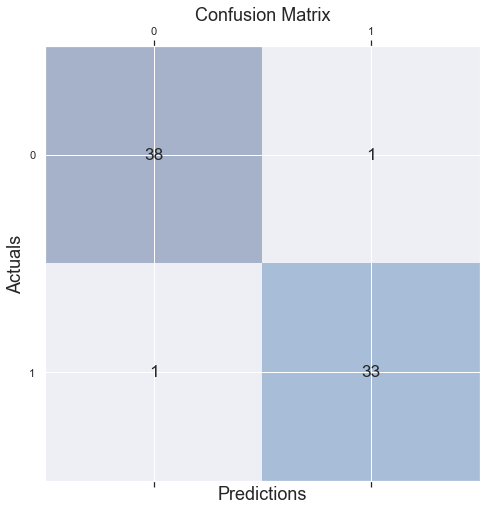

In [47]:
## Plotting Confusion Matrix
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()